In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # package that solves differential equations in python

In [15]:
def differential_eqs(a, tau):
    
    X, a1, Y, a2, Z, a3 = a # initializing parameters
    
    Xdot = a1 # reducing order of differential equation
    Ydot = a2 # reducing order of differential equation
    Zdot = a3 # reducing order of differential equation
    
    a1dot = -((X**2+Y**2-2*Z**2)*a2 + 3*Y*Z*a3)/(X**2+Y**2+Z**2)**(5/2)
    
    a2dot = ((X**2+Y**2-2*Z**2)*a1 + 3*X*Z*a3)/(X**2+Y**2+Z**2)**(5/2)
    
    a3dot = -(3*Z*(X*a2-Y*a1))/(X**2+Y**2+Z**2)**(5/2)
    
    return Xdot, a1dot, Ydot, a2dot, Zdot, a3dot

In [42]:
tau = np.linspace(0,25850,20000) # dimensionless time array

a0 = [1, 0.005, 1, 0.005, 0, 0.01] # initial conditions

solution = odeint(differential_eqs, a0, tau) # solving coupled differential equations using odeint package

X, Y, Z = solution[:,0], solution[:,2], solution[:, 4] # extracting our position functions

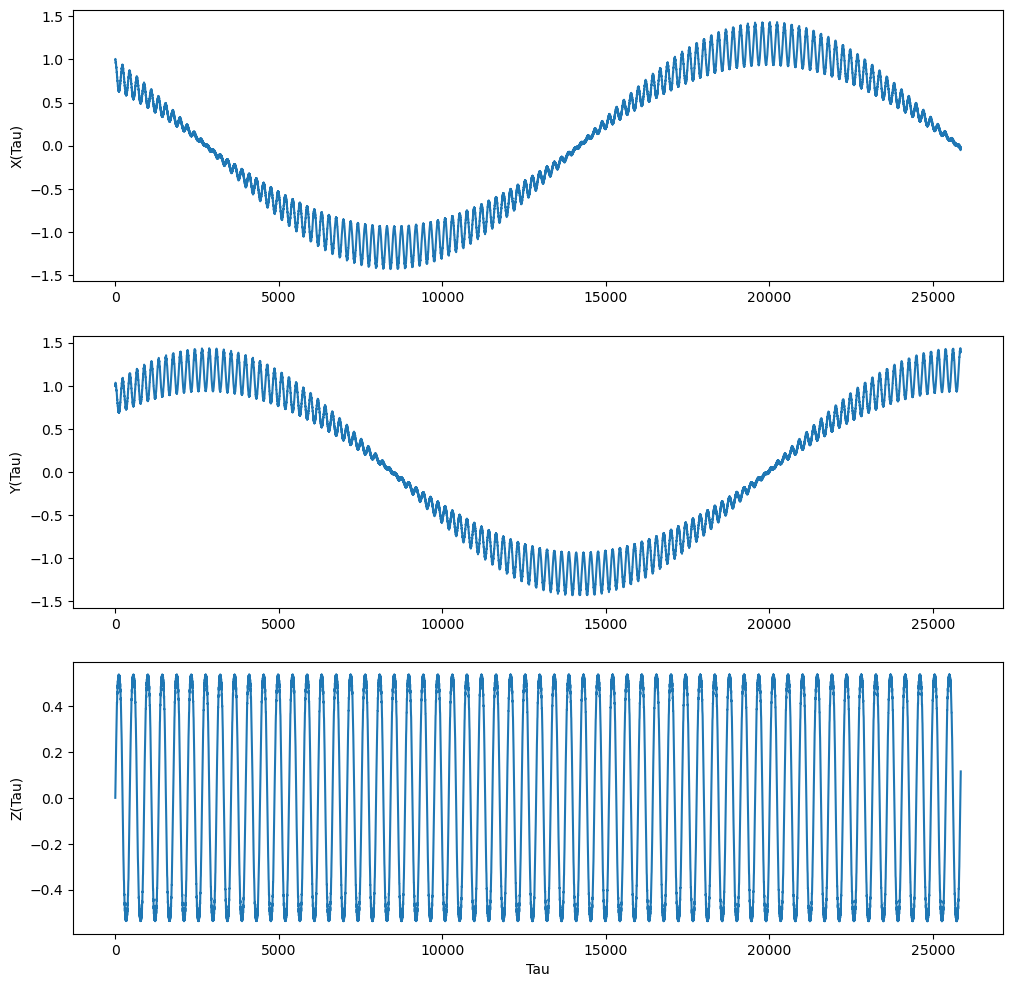

In [43]:
# Plotting all of our 1D position functions

plt.rcParams["figure.figsize"] = (12,12)
plt.figure()
plt.subplot(3,1,1)
#plt.xlabel('Tau')
plt.ylabel('X(Tau)')
plt.plot(tau, X)
plt.subplot(3,1,2)
#plt.xlabel('Tau')
plt.ylabel('Y(Tau)')
plt.plot(tau, Y)
plt.subplot(3,1,3)
plt.xlabel('Tau')
plt.ylabel('Z(Tau)')
plt.plot(tau, Z)

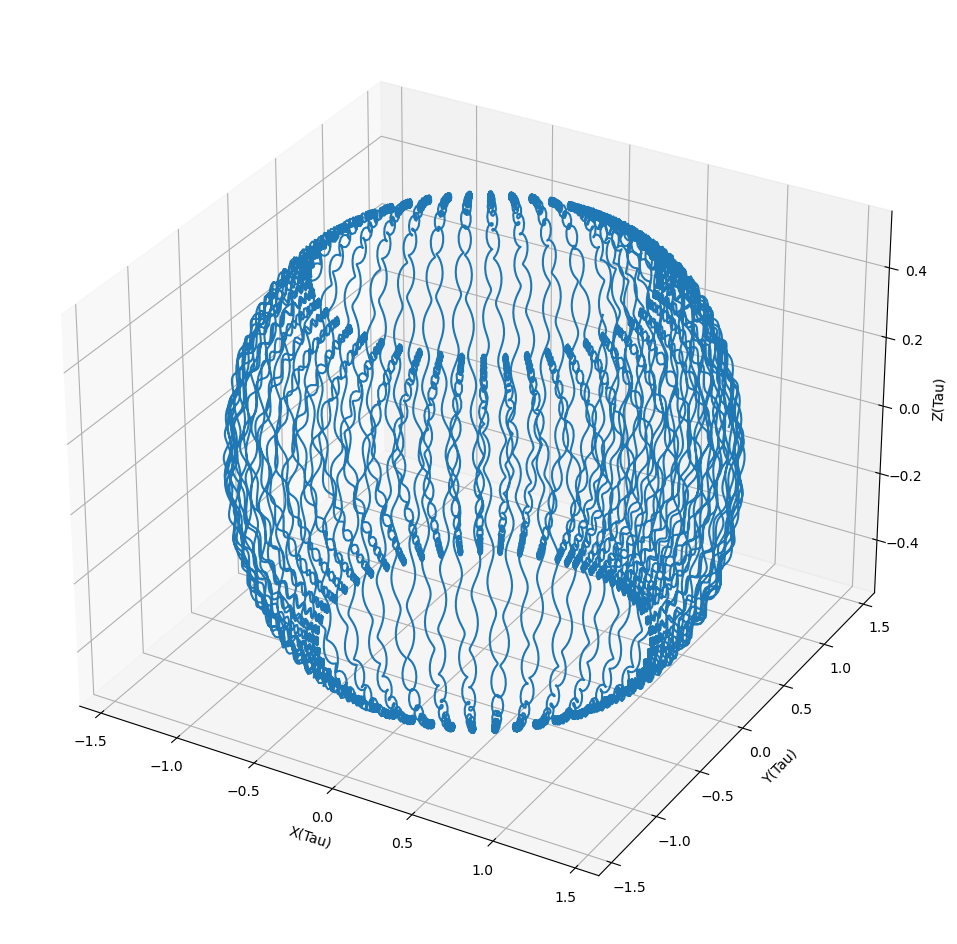

In [44]:
# Plotting the 3D trajectory of our charged particle

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel('X(Tau)')
ax.set_ylabel('Y(Tau)')
ax.set_zlabel('Z(Tau)')
ax.plot(X,Y,Z)

**These plots show a trajectory seemingly on the surface of a sphere with many different oscillatory behaviors in all three directions. Something interesting to note is that the poles of the sphere are never reached by our particle. Maybe this comes from the fact that the field lines emitted from the magnetic dipole originate and terminate in those regions.**